In [ ]:
# compute mean and std of the dataset
#     mean = 0.
#     std = 0.
#     for images, _ in trainloader:
#         batch_samples = images.size(0)  # batch size (the last batch can have smaller size!)
#         images = images.view(batch_samples, images.size(1), -1)
#         mean += images.mean(2).sum(0) 
#         std += images.std(2).sum(0)
#
#     mean /= len(trainloader.dataset)
#     std /= len(trainloader.dataset)
#     print('mean: ', mean)
#     print('std: ', std)
#     return mean, std
#
# def get_mean_std(trainloader):
#     # compute mean and std of the dataset


In [ ]:
import torch

from torch.optim import SGD  # example
from torch.optim.lr_scheduler import CosineAnnealingLR  # example

from warmup_scheduler_pytorch import WarmUpScheduler

from models.resnet import ResNet
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from datasets.eegdataset import GeneralEEGImageDataset, MySubset
import numpy as np
import matplotlib.pyplot as plt
import torch
data_path = '/data0/tianjunchao/dataset/CVPR2021-02785/data/img_pkl/32x32'
# dataset = GeneralEEGImageDataset(path=data_path, n_channels=1, grid_size=8)
dataset = GeneralEEGImageDataset(path=data_path, n_channels=1, grid_size=8)

dataloader = DataLoader(dataset, batch_size=128, shuffle=True, num_workers=4)
model = ResNet()
optimizer = SGD(model.parameters(), lr=0.1)
# lr_scheduler = CosineAnnealingLR(optimizer, T_max=100, eta_min=0.01)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=True, num_workers=4)


from torch.optim.lr_scheduler import LinearLR

epochs = 100
for epoch in range(epochs):
    for batch_data in data_loader:
        # output = model(...)
        # loss = loss_fn(output, ...)
        # loss.backward()
        # optimizer.step()
        pass
        # optimizer.zero_grad()
    print('epoch: {}, lr: {}'.format(epoch, optimizer.param_groups[0]['lr']))

    scheduler.step()

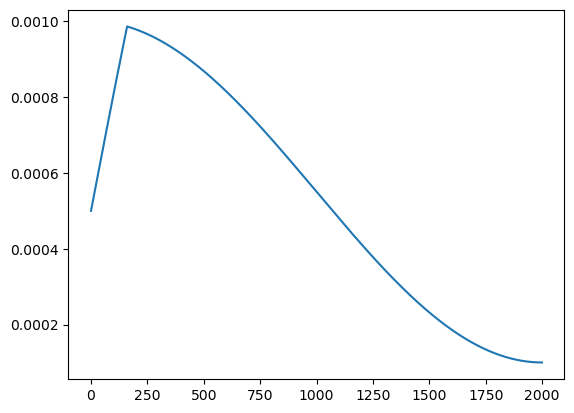

In [19]:
# draw a learning rate curve
# import sgd
# import torch
from torch.optim import SGD
from torch.optim.lr_scheduler import CosineAnnealingLR
import matplotlib.pyplot as plt
import torch
from torch.optim.lr_scheduler import LinearLR
from models.resnet import ResNet
model = ResNet(num_classes=2)

lr_list = []
optimizer = SGD(model.parameters(), lr=1e-3)
# fake dataset
epochs = 100
scheduler1 = LinearLR(optimizer, start_factor = 0.5, total_iters = 20*8)

scheduler2 = CosineAnnealingLR(optimizer,                           T_max = epochs*20, # Maximum number of iterations.
                             eta_min = 1e-4) # Minimum learning rate.
# data_loader = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=True, num_workers=4)
for epoch in range(epochs):
    # for batch_data in data_loader:
    #     pass
    for j in range(20):
        lr_list.append(optimizer.param_groups[0]['lr'])
        scheduler1.step()
        scheduler2.step()
plt.plot(lr_list)
plt.show()


In [4]:

import models.resnet as ResNet
model = ResNet(num_classes=2)

TypeError: 'module' object is not callable

In [5]:

import models.resnet as resnet

In [6]:
resnet.ResNet(num_classes=2)

ResNet(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0

In [20]:
import os
pid = os.getpid()
print("PID:", pid)


PID: 1838705


In [22]:
pid+2

1838707

In [24]:
str(pid)[-3:]

'705'

In [33]:
import numpy as np

def distinct_permutation_np(original_permutation):
    original_permutation_np = np.array(original_permutation)
    new_permutation = np.roll(original_permutation_np, -1)
    return new_permutation

original_permutation = [1, 2, 3,7, 4, 5]
distinct_permutation = distinct_permutation_np(original_permutation)

print("原始排列：", original_permutation)
print("不同的排列：", distinct_permutation)


原始排列： [1, 2, 3, 7, 4, 5]
不同的排列： [2 3 7 4 5 1]


In [38]:
import torch

def distinct_permutation_torch(original_permutation):
    original_permutation_torch = torch.tensor(original_permutation)
    new_permutation = original_permutation_torch.roll(-1)
    return new_permutation

original_permutation = [1,6, 2, 3, 4, 5]
distinct_permutation = distinct_permutation_torch(original_permutation)

print("原始排列：", original_permutation)
print("不同的排列：", distinct_permutation.tolist())


原始排列： [1, 6, 2, 3, 4, 5]
不同的排列： [6, 2, 3, 4, 5, 1]


In [41]:
distinct_permutation_torch(original_permutation)

tensor([6, 2, 3, 4, 5, 1])

In [47]:
import numpy as np

def distinct_permutation_np_random_shift(original_permutation):
    shift_amount = np.random.randint(1, len(original_permutation))  # 随机选择移位量
    original_permutation_np = np.array(original_permutation)
    new_permutation = np.roll(original_permutation_np, -shift_amount)
    return new_permutation.tolist()

original_permutation = [1, 2, 3, 4, 5]
distinct_permutation = distinct_permutation_np_random_shift(original_permutation)

print("原始排列：", original_permutation)
print("不同的排列：", distinct_permutation)


原始排列： [1, 2, 3, 4, 5]
不同的排列： [4, 5, 1, 2, 3]


In [49]:
x=[1,2,3]
y=[3,2,1]
# x to tensor
x=torch.tensor(x)
y=torch.tensor(y)
[x==y]

[tensor([False,  True, False])]

loss: 1.824, prev loss: 1.824, counter: 0
loss: 0.762, prev loss: 0.762, counter: 0
loss: 0.674, prev loss: 0.674, counter: 0
loss: 1.597, prev loss: 1.597, counter: 1
loss: 0.428, prev loss: 0.428, counter: 0
loss: 0.020, prev loss: 0.020, counter: 0
loss: 2.389, prev loss: 2.389, counter: 1
loss: 0.281, prev loss: 0.281, counter: 0
loss: 0.580, prev loss: 0.580, counter: 1
loss: 0.163, prev loss: 0.163, counter: 0
loss: 0.376, prev loss: 0.376, counter: 1
loss: 0.112, prev loss: 0.112, counter: 0
loss: 0.202, prev loss: 0.202, counter: 1
loss: 0.034, prev loss: 0.034, counter: 0
loss: 0.060, prev loss: 0.060, counter: 1
loss: 0.478, prev loss: 0.478, counter: 2
warning - early stopping counter: 3
loss: 1.679, prev loss: 1.679, counter: 3
loss: 1.171, prev loss: 1.171, counter: 0
loss: 0.147, prev loss: 0.147, counter: 0
loss: 0.400, prev loss: 0.400, counter: 1
loss: 0.519, prev loss: 0.519, counter: 2
loss: 0.156, prev loss: 0.156, counter: 0
loss: 0.641, prev loss: 0.641, counter: 

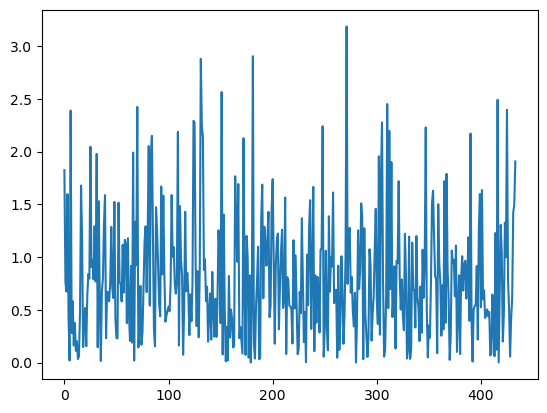

In [3]:
from utils.start import MyEarlyStopping
import numpy as np

early_stopping = MyEarlyStopping(patience=5)

# test loss random value from 2 to 5, 100 epochs
loss_list = []
while True:
    test_loss = np.abs(np.random.randn())
    # plot loss of curve
    loss_list.append(test_loss)
    early_stopping.check(test_loss)
    if early_stopping.stop:
        print(f'Early stopping after {epoch} epochs')
        break
# plot loss curve
import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.show()

            